In [1]:
from docx import Document
import spacy
from spacy_syllables import SpacySyllables
from string import punctuation
import matplotlib.pyplot as plt

The higher the number, the easier it is to read your document. In most cases, you should aim for a score of 60 or higher.

In [2]:
nlp = spacy.load("en_core_web_md")

/Users/lukas/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nlp.add_pipe("syllables", after="tagger")

In [4]:
document = Document('./../Linss-Lukas-ba.docx') 
document2 = Document('./../Bachelor_Thesis_stefan.docx')

In [5]:
bachelor_thesis1 = ''.join([p.text for p in document.paragraphs if len(p.text) >= 100])
bachelor_thesis2 = ''.join([p.text for p in document2.paragraphs if len(p.text) >= 100])


In [6]:
doc = nlp(bachelor_thesis1)
doc2 = nlp(bachelor_thesis2)

In [11]:
def fre_score(total_words, total_sentences, total_syllables):
    return 206.835 - 1.015 * (total_words / total_sentences) - 84.6 * (total_syllables / total_words)
    
def flesch_grade_level(total_words, total_sentences, total_syllables):
    return 0.39 * (total_words / total_sentences) + 11.8 * (total_syllables / total_words) - 15.59


In [14]:
running_words = 0
running_syllables = 0
running_sentences = 0
running_fre_scores = {}

for i, sent in enumerate(doc.sents):
    running_sentences += 1
    for token in sent:
        running_words += 1
        running_syllables += token._.syllables_count if token.text not in punctuation and token._.syllables_count != None else 0
    running_fre_scores[i] = (fre_score(running_words, running_sentences, running_syllables), flesch_grade_level(running_words, running_sentences, running_syllables))


running_words = 0
running_syllables = 0
running_sentences = 0
running_fre_scores2 = {}

for i, sent in enumerate(doc2.sents):
    running_sentences += 1
    for token in sent:
        running_words += 1
        running_syllables += token._.syllables_count if token.text not in punctuation and token._.syllables_count != None else 0
    running_fre_scores2[i] = (fre_score(running_words, running_sentences, running_syllables), flesch_grade_level(running_words, running_sentences, running_syllables))

In [27]:
y_fre = [el[0] for el in running_fre_scores.values()]
y_fre2 = [el[0] for el in running_fre_scores2.values()]
y_grade_score = [el[1] for el in running_fre_scores.values()]
y_grade_score2 = [el[1] for el in running_fre_scores2.values()]

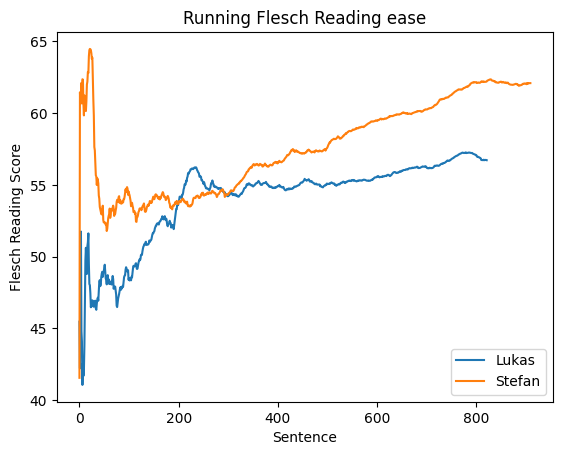

In [28]:
plt.plot(running_fre_scores.keys(), y_fre, label = "Lukas")
plt.plot(running_fre_scores2.keys(), y_fre2, label = "Stefan")
plt.title("Running Flesch Reading ease")
plt.xlabel('Sentence')
plt.ylabel('Flesch Reading Score')
plt.legend()
plt.show()

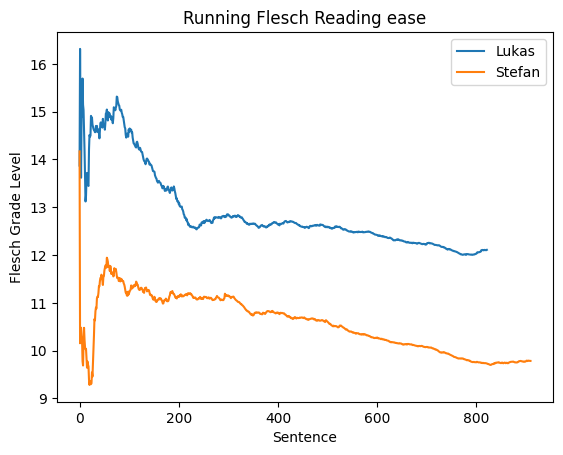

In [30]:
plt.plot(running_fre_scores.keys(), y_grade_score, label = "Lukas")
plt.plot(running_fre_scores2.keys(), y_grade_score2, label = "Stefan")
plt.title("Running Flesch Reading ease")
plt.xlabel('Sentence')
plt.ylabel('Flesch Grade Level')
plt.legend()
plt.show()